In [1]:
import pandas as pd
import numpy as np
import warnings

#visualizations
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

warnings.filterwarnings('ignore')

In [3]:
df = pd.read_excel(r"C:\Users\admin\Downloads\dev.xlsx")

In [4]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [5]:
df.info

<bound method DataFrame.info of        InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  Cust

In [6]:
print("Number of transactions: ", df['InvoiceNo'].nunique())
print("Number of products bought: ", df['StockCode'].nunique())
print("Number of customers:", df['CustomerID'].nunique())
print('Number of countries: ', df['Country'].nunique())

Number of transactions:  25900
Number of products bought:  4070
Number of customers: 4372
Number of countries:  38


In [7]:
np.sum(df.isnull())

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [8]:
print("Percentage of customers missing: ", round(df['CustomerID'].isnull().sum() * 100 / len(df),2),"%" )

Percentage of customers missing:  24.93 %


In [9]:
df['CustomerID_is_null'] = [1 if i == True else 0 for i in df.CustomerID.isnull()]

In [10]:
df1 = df[df['CustomerID_is_null'] == 1]

In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 135080 entries, 622 to 541540
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   InvoiceNo           135080 non-null  object        
 1   StockCode           135080 non-null  object        
 2   Description         133626 non-null  object        
 3   Quantity            135080 non-null  int64         
 4   InvoiceDate         135080 non-null  datetime64[ns]
 5   UnitPrice           135080 non-null  float64       
 6   CustomerID          0 non-null       float64       
 7   Country             135080 non-null  object        
 8   CustomerID_is_null  135080 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 8.2+ MB


In [12]:
df1.head(10)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CustomerID_is_null
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom,1
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom,1
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom,1
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom,1
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom,1
1447,536544,21790,VINTAGE SNAP CARDS,9,2010-12-01 14:32:00,1.66,NaN,United Kingdom,1
1448,536544,21791,VINTAGE HEADS AND TAILS CARD GAME,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom,1
1449,536544,21801,CHRISTMAS TREE DECORATION WITH BELL,10,2010-12-01 14:32:00,0.43,NaN,United Kingdom,1
1450,536544,21802,CHRISTMAS TREE HEART DECORATION,9,2010-12-01 14:32:00,0.43,NaN,United Kingdom,1
1451,536544,21803,CHRISTMAS TREE STAR DECORATION,11,2010-12-01 14:32:00,0.43,NaN,United Kingdom,1


In [13]:
print("Number of orders in df1:", df1['InvoiceNo'].nunique())
print("Avg. number of products per order in df1: ", round(df1['StockCode'].count() / df1['InvoiceNo'].nunique(),2) )
print("Avg. number of products per order in df: ",  round(df['StockCode'].count() / df['InvoiceNo'].nunique(),2) )

Number of orders in df1: 3710
Avg. number of products per order in df1:  36.41
Avg. number of products per order in df:  20.92


In [14]:
df['NewID'] = df['CustomerID']
df.loc[df['CustomerID_is_null'] == 1, ['NewID']] = df['InvoiceNo']

#drop CustomerID column since it isn't need anymore
#df = df.drop('CustomerID', 1)
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CustomerID_is_null,NewID
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,0,17850
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0,17850
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,0,17850
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0,17850
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0,17850


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   InvoiceNo           541909 non-null  object        
 1   StockCode           541909 non-null  object        
 2   Description         540455 non-null  object        
 3   Quantity            541909 non-null  int64         
 4   InvoiceDate         541909 non-null  datetime64[ns]
 5   UnitPrice           541909 non-null  float64       
 6   CustomerID          406829 non-null  float64       
 7   Country             541909 non-null  object        
 8   CustomerID_is_null  541909 non-null  int64         
 9   NewID               541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(5)
memory usage: 31.0+ MB


In [16]:
#Remove all non digits from column NewID
df['NewID'] = df['NewID'].astype(str).str.replace('\D+', '')

#Convert to integer
df['NewID'] = pd.to_numeric(df['NewID'])

#Check if the 'C' character was removed in the NewID column
df[df['NewID']== 580605]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CustomerID_is_null,NewID
524602,C580605,AMAZONFEE,AMAZON FEE,-1,2011-12-05 11:36:00,17836.46,NaN,United Kingdom,1,580605


In [17]:
Num_CustomerID = df['CustomerID'].nunique()
Num_df1_InvoiceNo = df1['InvoiceNo'].nunique()
Num_NewID = df['NewID'].nunique()
print("Number of Customers:", df['CustomerID'].nunique())
print("Number of Orders in df1:", df1['InvoiceNo'].nunique())
print("Number of Customers + Number of Orders in df1:", Num_CustomerID + Num_df1_InvoiceNo)
print("Number of New ID's:", df['NewID'].nunique())

Number of Customers: 4372
Number of Orders in df1: 3710
Number of Customers + Number of Orders in df1: 8082
Number of New ID's: 8082


In [18]:
df.describe()

,Quantity,UnitPrice,CustomerID,CustomerID_is_null,NewID
count,541909.000000,541909.000000,406829.000000,541909.000000,541909.000000
mean,9.552250,4.611114,15287.690570,0.249267,253869.471330
std,218.081158,96.759853,1713.600303,0.432589,176036.804611
min,-80995.000000,-11062.060000,12346.000000,0.000000,123460.000000
25%,1.000000,1.250000,13953.000000,0.000000,143670.000000
50%,3.000000,2.080000,15152.000000,0.000000,162490.000000
75%,10.000000,4.130000,16791.000000,0.000000,182830.000000
max,80995.000000,38970.000000,18287.000000,1.000000,581498.000000


In [19]:
cancelled_orders = df[df['InvoiceNo'].astype(str).str.contains('C')]
cancelled_orders.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CustomerID_is_null,NewID
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom,0,145270
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,0,153110
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,0,175480
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,0,175480
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,0,175480


In [20]:
cancelled_orders[cancelled_orders['Quantity']>0]


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CustomerID_is_null,NewID


In [21]:
print("There were", len(cancelled_orders), "cancelled orders.")

#Calculate the percentage of cancellations by dividing the cancelled orders by the total orders
total_orders = df['InvoiceNo'].nunique()
number_cancelled = len(cancelled_orders)
print('Percentage of orders cancelled: {:.2f}% '.format(number_cancelled / total_orders * 100))

There were 9288 cancelled orders.
Percentage of orders cancelled: 35.86% 


In [22]:
df[df['UnitPrice'] < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CustomerID_is_null,NewID
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom,1,563186
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom,1,563187


In [23]:
groupby_customers = pd.DataFrame(df.groupby('NewID')['InvoiceNo'].nunique())
groupby_customers.head()

,InvoiceNo
NewID,
123460,2
123470,7
123480,4
123490,1
123500,1


In [24]:
groupby_customers.describe()


,InvoiceNo
count,8082.000000
mean,3.204652
std,7.162265
min,1.000000
25%,1.000000
50%,1.000000
75%,3.000000
max,248.000000


In [25]:
groupby_invoice = pd.DataFrame(df.groupby('InvoiceNo')['StockCode'].nunique())
groupby_invoice.columns = ['Number of Items per Order']
groupby_invoice.head()

,Number of Items per Order
InvoiceNo,
536365,7
536366,2
536367,12
536368,4
536369,1


In [26]:
groupby_invoice.describe()

,Number of Items per Order
count,25900.000000
mean,20.510618
std,42.500488
min,1.000000
25%,2.000000
50%,10.000000
75%,23.000000
max,1110.000000


In [27]:
groupby_ID = pd.DataFrame(df.groupby('NewID')['StockCode'].nunique())
groupby_ID.columns = ['Number of Items per Customer']
groupby_ID.head()

,Number of Items per Customer
NewID,
123460,1
123470,103
123480,22
123490,73
123500,17


In [28]:
groupby_ID.describe()

,Number of Items per Customer
count,8082.000000
mean,49.759837
std,91.220932
min,1.000000
25%,1.000000
50%,17.000000
75%,58.000000
max,1794.000000


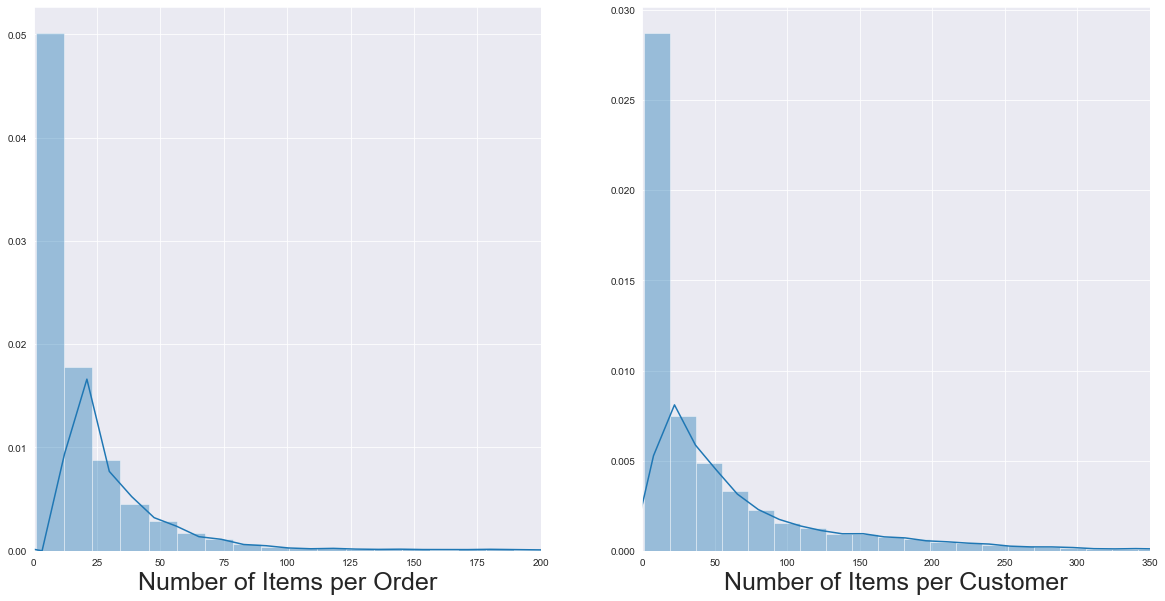

In [29]:
sns.set_style("darkgrid")
fig, ax = plt.subplots(1,2)
fig.set_size_inches(20, 10)
plt1 = sns.distplot(groupby_invoice['Number of Items per Order'], ax=ax[0], bins=100)
plt1.set_xlim(0,200)
plt1.set_xlabel(xlabel='Number of Items per Order',fontsize=25)
plt2 = sns.distplot(groupby_ID['Number of Items per Customer'], ax=ax[1], bins=100)
plt2.set_xlim(0,350)
plt2.set_xlabel(xlabel='Number of Items per Customer',fontsize=25)
plt.show()

In [30]:
df['Total_Cost'] = df['Quantity'] * df['UnitPrice']

In [31]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CustomerID_is_null,NewID,Total_Cost
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,0,178500,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0,178500,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,0,178500,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0,178500,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0,178500,20.34


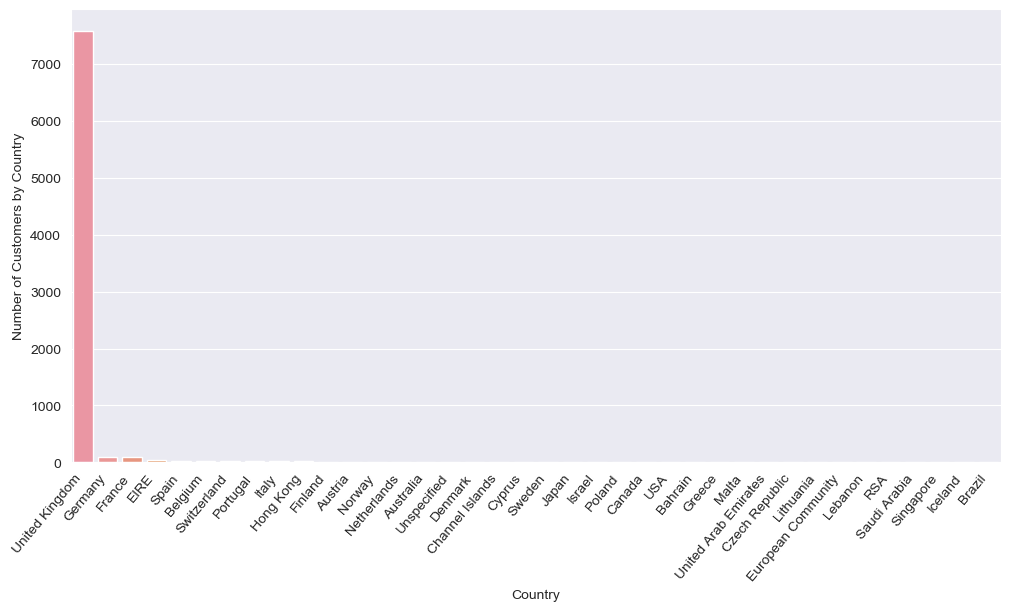

In [32]:
country_df = pd.DataFrame(df.groupby('Country')['NewID'].nunique())
country_df.columns = ['Number of Customers by Country']
country_df.sort_values('Number of Customers by Country', inplace=True, ascending=False)
fig, ax = plt.subplots(figsize=(12,6),dpi=100)
ax=sns.barplot(x=country_df.index, y=country_df['Number of Customers by Country'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=50, ha="right")
plt.show()

TypeError: Cannot cast array data from dtype('int64') to dtype('int32') according to the rule 'safe'

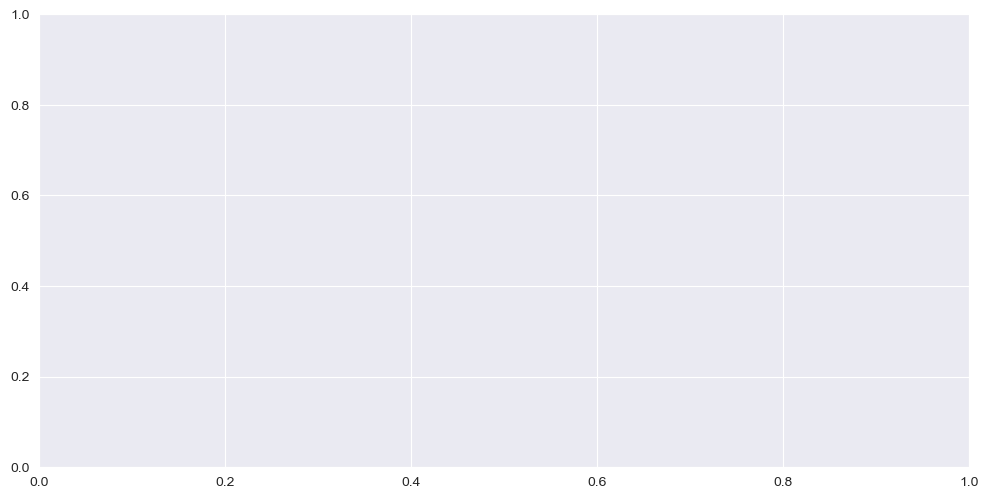

In [34]:
fig1, ax1 = plt.subplots(figsize=(12,6),dpi=100)
ax1=sns.barplot(x='Country', y='Total_Cost', data=df, estimator=max, ax=ax1)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=50, ha="right")
plt.show()

In [35]:
df_uk = df[df['Country']=='United Kingdom']
df_uk.describe()

,Quantity,UnitPrice,CustomerID,CustomerID_is_null,NewID,Total_Cost
count,495478.000000,495478.000000,361878.000000,495478.000000,495478.000000,495478.000000
mean,8.605486,4.532422,15547.871368,0.269639,264016.667176,16.525065
std,227.588756,99.315438,1594.402590,0.443772,179302.718367,394.839116
min,-80995.000000,-11062.060000,12346.000000,0.000000,123460.000000,-168469.600000
25%,1.000000,1.250000,14194.000000,0.000000,146390.000000,3.290000
50%,3.000000,2.100000,15514.000000,0.000000,166390.000000,8.290000
75%,10.000000,4.130000,16931.000000,1.000000,538566.000000,16.630000
max,80995.000000,38970.000000,18287.000000,1.000000,581498.000000,168469.600000


In [36]:
print("Percentage of customers from the UK: ", round(df_uk['NewID'].nunique() * 100 / df['NewID'].nunique(),2),"%" )
print("Number of transactions: ", df_uk['InvoiceNo'].nunique())
print("Number of products Bought: ", df_uk['StockCode'].nunique())
print("Number of customers:", df_uk['NewID'].nunique())

Percentage of customers from the UK:  93.88 %
Number of transactions:  23494
Number of products Bought:  4065
Number of customers: 7587


In [37]:
uk_product = df_uk.groupby(['StockCode','Description'],as_index= False)['Quantity'].sum().sort_values(by='Quantity', ascending=False)
uk_product.head(10)

,StockCode,Description,Quantity
3154,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,48326
4340,85099B,JUMBO BAG RED RETROSPOT,43167
1237,22197,POPCORN HOLDER,34365
3274,84879,ASSORTED COLOUR BIRD ORNAMENT,33679
4353,85123A,WHITE HANGING HEART T-LIGHT HOLDER,32901
1677,22616,PACK OF 12 LONDON TISSUES,25307
437,21212,PACK OF 72 RETROSPOT CAKE CASES,24702
1216,22178,VICTORIAN GLASS HANGING T-LIGHT,23242
41,17003,BROCADE RING PURSE,22801
11,15036,ASSORTED COLOURS SILK FAN,20322


In [39]:
import time
import datetime as dt
from pandas.plotting import scatter_matrix

#Predictive models
import sklearn.cluster as cluster
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_samples, silhouette_score

In [40]:
df_uk.shape

(495478, 11)

In [41]:
df_uk = df_uk[df_uk['Quantity']>0]
df_uk.shape

(486286, 11)

In [42]:
df_uk.dropna(subset=['CustomerID'],how='all',inplace=True)
df_uk.shape

(354345, 11)

In [43]:
print("Number of transactions: ", df_uk['InvoiceNo'].nunique())
print("Number of products bought: ",df_uk['StockCode'].nunique())
print("Number of customers:", df_uk['CustomerID'].nunique() )
print("Percentage of customers NA: ", round(df_uk['CustomerID'].isnull().sum() * 100 / len(df),2),"%" )

Number of transactions:  16649
Number of products bought:  3645
Number of customers: 3921
Percentage of customers NA:  0.0 %


In [44]:
df_uk['InvoiceDate'].max()

Timestamp('2011-12-09 12:49:00')

In [45]:
now = dt.date(2011,12,9)

In [46]:
df_uk['Date'] = df_uk['InvoiceDate'].dt.date

In [47]:
df_recency = df_uk.groupby(by='CustomerID', as_index=False)['Date'].max()
df_recency.columns = ['CustomerID', 'Last_Purchase_Date']
df_recency.head()

,CustomerID,Last_Purchase_Date
0,12346.0,2011-01-18
1,12747.0,2011-12-07
2,12748.0,2011-12-09
3,12749.0,2011-12-06
4,12820.0,2011-12-06


In [48]:
df_recency['Recency'] = df_recency['Last_Purchase_Date'].apply(lambda x: (now - x).days)
df_recency.head()

,CustomerID,Last_Purchase_Date,Recency
0,12346.0,2011-01-18,325
1,12747.0,2011-12-07,2
2,12748.0,2011-12-09,0
3,12749.0,2011-12-06,3
4,12820.0,2011-12-06,3


In [49]:
df_recency.drop('Last_Purchase_Date', axis=1, inplace=True)

In [50]:
#Make a copy of df_uk and drop duplicates
df_uk_copy = df_uk
df_uk_copy.drop_duplicates(subset=['InvoiceNo', 'CustomerID'], keep="first", inplace=True)

#Calculate the frequency of purchases
df_frequency = df_uk_copy.groupby(by='CustomerID', as_index=False)['InvoiceNo'].count()
df_frequency.columns = ['CustomerID','Frequency']
df_frequency.head()

,CustomerID,Frequency
0,12346.0,1
1,12747.0,11
2,12748.0,210
3,12749.0,5
4,12820.0,4


In [51]:
df_monetary = df_uk.groupby(by='CustomerID',as_index=False).agg({'Total_Cost': 'sum'})
df_monetary.columns = ['CustomerID', 'Monetary']
df_monetary.head()

,CustomerID,Monetary
0,12346.0,77183.60
1,12747.0,689.49
2,12748.0,3841.31
3,12749.0,98.35
4,12820.0,58.20


rfm table

In [52]:
df_merge = df_recency.merge(df_frequency, on='CustomerID')
df_merge.head()

,CustomerID,Recency,Frequency
0,12346.0,325,1
1,12747.0,2,11
2,12748.0,0,210
3,12749.0,3,5
4,12820.0,3,4


In [53]:
df_rfm = df_merge.merge(df_monetary,on='CustomerID')
df_rfm.set_index('CustomerID',inplace=True)
df_rfm.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,325,1,77183.60
12747.0,2,11,689.49
12748.0,0,210,3841.31
12749.0,3,5,98.35
12820.0,3,4,58.20


In [54]:
quantiles = df_rfm.quantile(q=[0.25,0.5,0.75])
quantiles


,Recency,Frequency,Monetary
0.25,17.0,1.0,17.7
0.50,50.0,2.0,45.4
0.75,142.0,5.0,124.5


In [55]:
quantiles.to_dict()

{'Recency': {0.25: 17.0, 0.5: 50.0, 0.75: 142.0},
 'Frequency': {0.25: 1.0, 0.5: 2.0, 0.75: 5.0},
 'Monetary': {0.25: 17.700000000000003, 0.5: 45.4, 0.75: 124.50000000000001}}

In [56]:
def Rscore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

#Arguments (x= value, p = recency, monetary_value, frequency, d = quartiles dict)
def FMscore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4

In [57]:
rfm_segmentation = df_rfm
rfm_segmentation['R_Quartile'] = rfm_segmentation['Recency'].apply(Rscore, args=('Recency',quantiles))
rfm_segmentation['F_Quartile'] = rfm_segmentation['Frequency'].apply(FMscore, args=('Frequency',quantiles))
rfm_segmentation['M_Quartile'] = rfm_segmentation['Monetary'].apply(FMscore, args=('Monetary',quantiles))

In [58]:
rfm_segmentation.head()

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile
CustomerID,,,,,,
12346.0,325,1,77183.60,1,1,4
12747.0,2,11,689.49,4,4,4
12748.0,0,210,3841.31,4,4,4
12749.0,3,5,98.35,4,3,3
12820.0,3,4,58.20,4,3,3


In [59]:
rfm_segmentation['RFM_Score'] = rfm_segmentation.R_Quartile.map(str) \
                            + rfm_segmentation.F_Quartile.map(str) \
                            + rfm_segmentation.M_Quartile.map(str)
rfm_segmentation.head()

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFM_Score
CustomerID,,,,,,,
12346.0,325,1,77183.60,1,1,4,114
12747.0,2,11,689.49,4,4,4,444
12748.0,0,210,3841.31,4,4,4,444
12749.0,3,5,98.35,4,3,3,433
12820.0,3,4,58.20,4,3,3,433


In [60]:
rfm_segmentation[rfm_segmentation['RFM_Score']=='444'].head(10)

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFM_Score
CustomerID,,,,,,,
12747.0,2,11,689.49,4,4,4,444
12748.0,0,210,3841.31,4,4,4,444
12828.0,2,6,154.80,4,4,4,444
12839.0,2,14,233.91,4,4,4,444
12841.0,4,25,328.74,4,4,4,444
12877.0,3,12,365.79,4,4,4,444
12901.0,8,28,9230.45,4,4,4,444
12919.0,8,6,267.40,4,4,4,444
12921.0,9,37,1014.11,4,4,4,444


In [61]:
print("Best Customers: ",len(rfm_segmentation[rfm_segmentation['RFM_Score']=='444']))
print('Loyal Customers: ',len(rfm_segmentation[rfm_segmentation['F_Quartile']==4]))
print("Big Spenders: ",len(rfm_segmentation[rfm_segmentation['M_Quartile']==4]))
print('Almost Lost: ', len(rfm_segmentation[rfm_segmentation['RFM_Score']=='244']))
print('Lost Customers: ',len(rfm_segmentation[rfm_segmentation['RFM_Score']=='144']))
print('Lost Cheap Customers: ',len(rfm_segmentation[rfm_segmentation['RFM_Score']=='111']))

Best Customers:  370
Loyal Customers:  791
Big Spenders:  980
Almost Lost:  65
Lost Customers:  11
Lost Cheap Customers:  377


In [62]:
rfm_data = df_rfm.drop(['R_Quartile','F_Quartile','M_Quartile','RFM_Score'],axis=1)
rfm_data.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,325,1,77183.60
12747.0,2,11,689.49
12748.0,0,210,3841.31
12749.0,3,5,98.35
12820.0,3,4,58.20


In [63]:
rfm_data.corr()

,Recency,Frequency,Monetary
Recency,1.000000,-0.273779,-0.030123
Frequency,-0.273779,1.000000,0.163225
Monetary,-0.030123,0.163225,1.000000


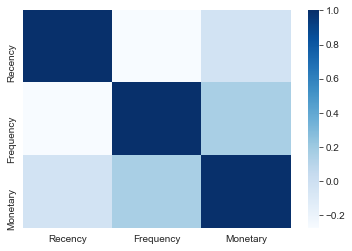

In [64]:
sns.heatmap(rfm_data.corr(),cmap="Blues")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x14434E90>,
      dtype=object)

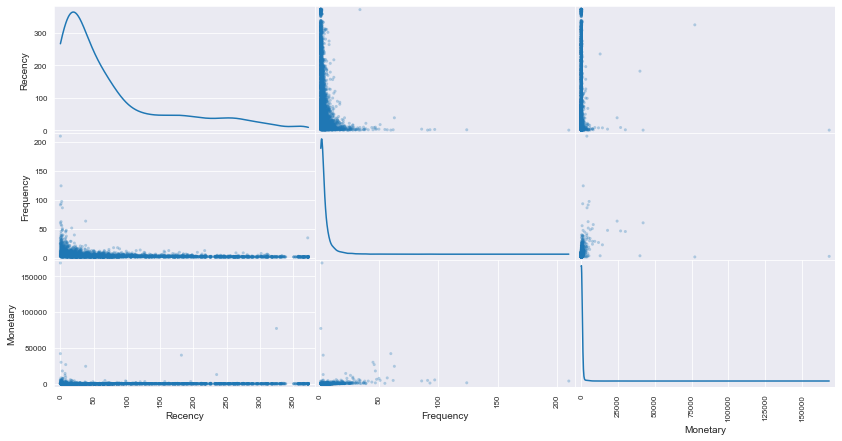

In [65]:
scatter_matrix(rfm_data, alpha = 0.3, figsize = (14,7), diagonal = 'kde')

In [66]:
rfm_r_log = np.log(rfm_data['Recency']+0.1) #log(0) is undefined
rfm_f_log = np.log(rfm_data['Frequency'])
rfm_m_log = np.log(rfm_data['Monetary']+0.1)

In [67]:
log_data = pd.DataFrame({'Monetary': rfm_m_log, 'Recency': rfm_r_log, 'Frequency': rfm_f_log})


In [68]:
log_data.head()


,Monetary,Recency,Frequency
CustomerID,,,
12346.0,11.253944,5.784133,0.000000
12747.0,6.536097,0.741937,2.397895
12748.0,8.253595,-2.302585,5.347108
12749.0,4.589549,1.131402,1.609438
12820.0,4.065602,1.131402,1.386294


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12EA4EB0>,
      dtype=object)

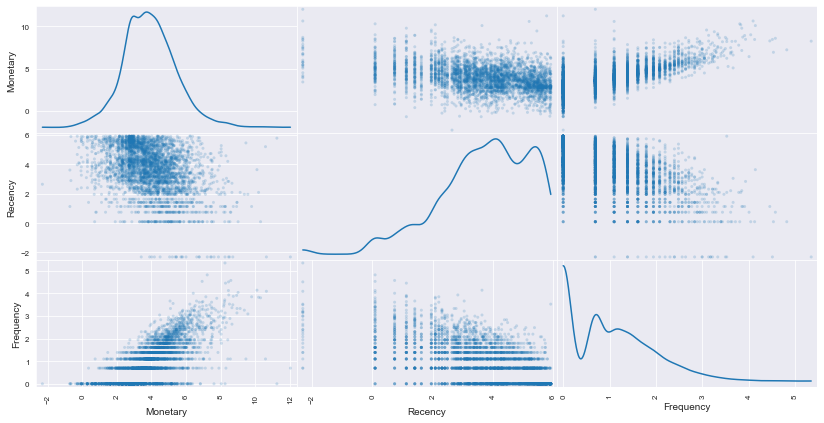

In [69]:
scatter_matrix(log_data, alpha = 0.2, figsize = (14,7), diagonal = 'kde')


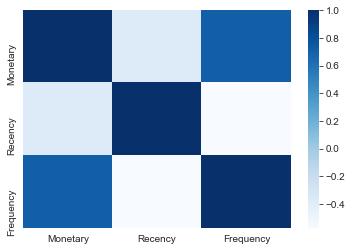

In [70]:
sns.heatmap(log_data.corr(),cmap="Blues")


In [71]:
log_data.corr()


,Monetary,Recency,Frequency
Monetary,1.000000,-0.368472,0.716935
Recency,-0.368472,1.000000,-0.573982
Frequency,0.716935,-0.573982,1.000000


In [83]:
matrix = log_data
for n_clusters in range(2,10):
    kmeans = KMeans(init='k-means++', n_clusters = n_clusters, n_init=100)
    kmeans.fit(matrix)
    clusters = kmeans.predict(matrix)
    silhouette_avg = silhouette_score(matrix, clusters)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.3893778047545115
For n_clusters = 3 The average silhouette_score is : 0.3019901422904056
For n_clusters = 4 The average silhouette_score is : 0.31210698984940155
For n_clusters = 5 The average silhouette_score is : 0.29175680780560714
For n_clusters = 6 The average silhouette_score is : 0.2971152471372098
For n_clusters = 7 The average silhouette_score is : 0.2939986983351904
For n_clusters = 8 The average silhouette_score is : 0.28879553450120643
For n_clusters = 9 The average silhouette_score is : 0.2905004329326705


In [84]:
n_clusters = 2
kmeans = KMeans(init='k-means++', n_clusters = n_clusters, n_init=30)
kmeans.fit(matrix)
clusters_customers = kmeans.predict(matrix)
silhouette_avg = silhouette_score(matrix, clusters_customers)
print('score de silhouette: {:<.3f}'.format(silhouette_avg))

score de silhouette: 0.389


In [78]:
pd.DataFrame(pd.Series(clusters_customers).value_counts(), columns = ['Number Customers']).T


,1,0
Number Customers,2360,1561


Although we didn't obtain two clearly separated clusters, we were able to build a model that can classify new customers into "low value" and "high value" groups. Generally, if a customer only transacted with us a few times, they needed to be at least in the top 50th percentile in monetary spending to be considered a "high value customer". The clusters assignments are muddled, which may be due to outliers that weren't removed.

Limitations of k-means clustering:

1.There is no assurance that it will lead to the global best solution.
2.Can't deal with different shapes(not circular) and consider one point's probability of belonging to more than one cluster.

These disadvantages of k-means show that for many datasets (especially low-dimensional datasets), it may not perform as well as you might hope.

Recommendation

How we want to continue this analysis depends on how the business plans to use the results and the level of granularity the business stakeholders want to see in the clusters. We can also ask what range of customer behavior from high to low value customers are the stakeholders interested in exploring. From those answers, various methods of clustering can be used and applied on RFM variable or directly on the transaction data set.